In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [4]:
from os.path import join

In [2]:
FIG = "/Users/rdora/Dropbox/inmegen/breast_cancer/article/figures/"
DATA = "/Users/rdora/breast_cancer/data/"

In [66]:
healthy = np.genfromtxt(join(DATA, "sample_healthy.txt"))

In [67]:
basal = np.genfromtxt(join(DATA, "sample_basal.txt"))

In [69]:
healthy = list([h, "Healthy"] for h in healthy)

In [70]:
basal = list([h, "Basal"] for h in basal)

In [71]:
df = pd.DataFrame(healthy + basal, columns=['MI', 'Tissue'])

In [72]:
q_h = np.quantile(df[df.Tissue=='Healthy']['MI'], q=.9)
q_b = np.quantile(df[df.Tissue=='Basal']['MI'], q=.9)

In [76]:
m_h = np.quantile(df[df.Tissue=='Healthy']['MI'], q=.5)
m_b = np.quantile(df[df.Tissue=='Basal']['MI'], q=.5)

In [143]:
fig.savefig?

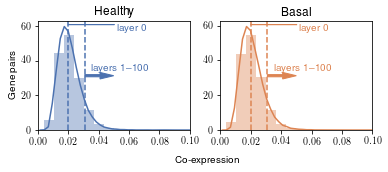

In [149]:
fig, axs = plt.subplots(1,2, figsize=(6, 2))

blue = (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
orange = (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

sns.distplot(df[df.Tissue=="Healthy"]['MI'], color=blue, ax=axs[0])
sns.distplot(df[df.Tissue=="Basal"]['MI'], color=orange, ax=axs[1])

# Vertical lines
axs[0].axvline(q_h, linestyle="--", color=blue)
axs[1].axvline(q_b, linestyle="--", color=orange)

axs[0].set_xlim(0, 0.1)
axs[1].set_xlim(0, 0.1);

# Medians
axs[0].axvline(m_h, linestyle="--", color=blue)
axs[1].axvline(m_b, linestyle="--", color=orange)

axs[0].arrow(0.31, 0.5, 0.1, 0, transform=axs[0].transAxes, width=0.02,
            facecolor=blue, edgecolor=blue)
axs[0].text(0.35, 0.55, "layers 1--100", transform=axs[0].transAxes, fontdict={"color": blue})

axs[0].arrow(0.2, 0.97, 0.3, 0, transform=axs[0].transAxes, width=0.001,
            facecolor=blue, edgecolor=blue)
axs[0].text(0.52, 0.92, "layer 0", transform=axs[0].transAxes, fontdict={"color": blue})

# Basal
axs[1].arrow(0.31, 0.5, 0.1, 0, transform=axs[1].transAxes, width=0.02,
            facecolor=orange, edgecolor=orange)
axs[1].text(0.35, 0.55, "layers 1--100", transform=axs[1].transAxes, fontdict={"color": orange})

axs[1].arrow(0.2, 0.97, 0.3, 0, transform=axs[1].transAxes, width=0.001,
            facecolor=blue, edgecolor=orange)
axs[1].text(0.52, 0.92, "layer 0", transform=axs[1].transAxes, fontdict={"color": orange})

axs[0].set_title("Healthy")
axs[1].set_title("Basal")

# axs[0].set_xticklabels([])
axs[0].set_xlabel("")
axs[1].set_xlabel("")
axs[0].text(0.9, -.3, "Co-expression", transform=axs[0].transAxes, fontdict={"size":10})
axs[0].text(-.2, 0.3, "Gene pairs", rotation=90, transform=axs[0].transAxes)

#fig.tight_layout();

fig.savefig(join(FIG, "sample_dists.png"), dpi=300, bbox_inches="tight")